In [1]:
# This notebook illustrates FUNMAN solving PDE models expressed as Petrinets 

# Import funman related code
import os
from funman.api.run import Runner
from funman_demo import summarize_results
from funman_demo.example.pde import plot_spatial_timeseries
from IPython.display import HTML
import matplotlib.pyplot as plt
import itertools


RESOURCES = os.path.join(
   os.getcwd(), "../../Model-Representations/petrinet/examples/pde/"
)


def get_locations(dimensions, num_disc):
   locations = list(itertools.product(*[range(num_disc) for d in range(dimensions)]))
   locations = ["_".join([str(pos) for pos in location]) for location in locations]
   return locations

In [ ]:
# Halfar Model

# Instance parameters (used to identify input file)
dimensions = 1
boundary_slope = 0.0
num_disc = 5
# derivative = "centered"
# derivative = "backward"
derivative = "forward"

EXAMPLE_DIR = os.path.join(RESOURCES, "halfar")
instance = f"halfar_{derivative}_{dimensions}_{boundary_slope}_{num_disc}.json"
instance_file = os.path.join(EXAMPLE_DIR, instance)

locations = get_locations(dimensions, num_disc)

# Funman parameters
steps = 10
dt = 10


# Create constraint pos_i on the height h at each location i
# pos_i: 0 <= h_i < 2, for i in [0, 4]

variables = [f"h_{loc}" for loc in locations]
height_bounds = [
    {
        "name": f"pos_{i}",
         "variable": i,
         "interval": {"lb": 0, "ub": 2}
    }
    for i in variables
]

# Create request for the analysis
# structure_parameters: timepoints to evaluate 
# parameters: A, dt
# constraints: height bounds (above), slope on boundaries is well-formed
# config: uses defaults

request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {
                    "timepoints": range(0,(steps+1)*dt, dt)
                }
            ],
        },
        
    ],
    "parameters": [
        {
            "name": "A",
            "label":"any",
            "interval": {"lb":1e-20, "ub":1e-12}
         },
        # {
        #     "name": "dt",
        #     "label":"any",
        #     "interval": {"lb":1, "ub":11}
        #  },
         {
            "name": "dx",
            "label":"any",
            "interval": {"lb":1, "ub":1}
         }
    ],
    "constraints": height_bounds + 
    [
        # {"name": "LHS_slope",
        #     "variables": ["h_1", "h_0"],
        #     "weights": [1, -1],
        #     "additive_bounds": {"lb": 0},
        #     "timepoints": {"lb": 0}
        # }, 
        # {"name": "RHS_slope",
        #     "variables": ["h_3", "h_4"],
        #     "weights": [1, -1],
        #     "additive_bounds": {"lb": 0},
        #     "timepoints": {"lb": 0}
        # }
    #  {"name": "melt_h_5",
    #      "variable": "h_5",
    #      "interval": {"lb": 0, "ub": .8},
    #      "timepoints": {"lb": 5}
    #     },

        ],
    "config": {
        "save_smtlib": "./out"
    },
}


# Use request_dict
results = Runner().run(
    instance_file,
    request_dict,
    description=f"Halfar Demo {instance}",
    case_out_dir="./out",
    # dump_plot=True,
    parameters_to_plot=["A", "timestep"],
    point_plot_config = {
        "label_marker":{"true":",", "false": ","},  
    }
)

summarize_results(variables, results)
h, dh, anim_h, anim_dh = plot_spatial_timeseries(results, outdir="./out", fps=dt)
plt.close()
display(h)
plt.close()
display(dh)

[1.00000, 1.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
2024-02-08 15:12:33,815 - funman.scenario.scenario - WARNING - Warning: The scenario is not normalized!
2024-02-08 15:12:35,505 - funman.search.box_search - INFO - progress: 0.09091
2024-02-08 15:12:35,551 - funman.search.box_search - INFO - progress: 0.18182
2024-02-08 15:12:35,592 - funman.search.box_search - INFO - progress: 0.27273
2024-02-08 15:12:35,628 - funman.search.box_search - INFO - progress: 0.36364
2024-02-08 15:12:35,659 - funman.search.box_search - INFO - progress: 0.45455
2024-02-08 15:12:35,687 - funman.search.box_search - INFO - progress: 0.54545
2024-02-08 15:12:35,712 - funman.search.box_search - INFO - progress: 0.63636
2024-02-08 15:12:35,733 - funman.search.box_search - INFO - progress: 0.72727
2024-02-08 15:12:35,752 - funman.search.box_search - INFO - progress: 0.81818
2024-02-08 15:12:35,768 - funman.search.box_search - INFO - pro

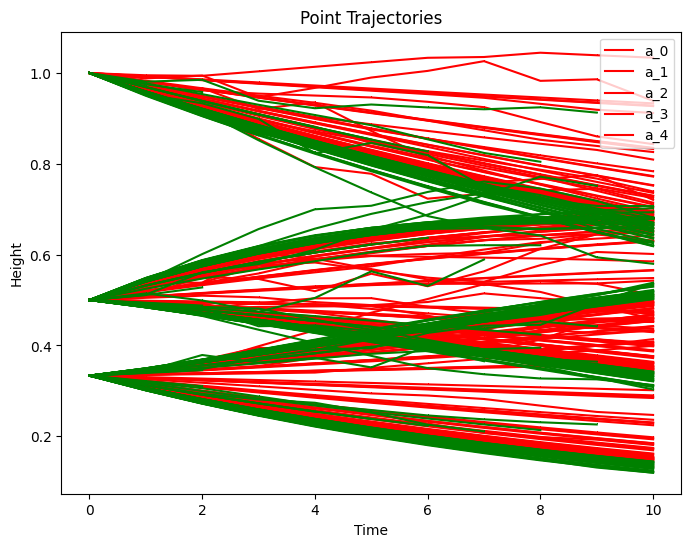

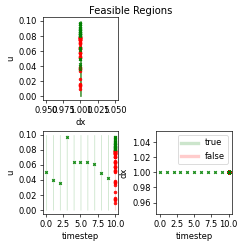

********************************************************************************
********************************************************************************
* Analysis Summary
********************************************************************************
83 Points (+:39, -:44), 83 Boxes (+:39, -:44)
Parameters = {dx[1.0, 1.0): 1.0, u[1e-18, 0.1): 0.07582035282290193}
        # {dx[1.0, 1.0): 1.0, u[1e-18, 0.1): 0.07582035282290193}
                   a_0       a_1       a_2       a_3       a_4   dx  id  label  \
time                                                                     
0.0   0.333333  0.500000  1.000000  0.500000  0.333333  1.0   0  false   
1.0   0.308060  0.487363  0.962090  0.537910  0.345970  1.0   0  false   
2.0   0.284703  0.473768  0.926096  0.570072  0.360523  1.0   0  false   
3.0   0.263116  0.459433  0.891800  0.597066  0.376411  1.0   0  false   
4.0   0.243167  0.444549  0.859018  0.619412  0.393141  1.0   0  false   
5.0   0.224730  0.429280  0.827

In [2]:
# Advection Model

# Instance parameters (used to identify input file)
dimensions = 1
boundary_slope = 0.0
num_disc = 5
# derivative = "centered"
derivative = "backward"
# derivative = "forward"

EXAMPLE_DIR = os.path.join(RESOURCES, "advection")
instance = f"advection_{derivative}_{dimensions}_{boundary_slope}_{num_disc}.json"
instance_file = os.path.join(EXAMPLE_DIR, instance)

locations = get_locations(dimensions, num_disc)

# Funman parameters
steps = 10
dt = 1


# The energy at each location is non-negative
variables = [f"a_{loc}" for loc in locations]
height_bounds = [
    {
        "name": f"pos_{i}",
         "variable": i,
         "interval": {"lb": 0}
    }
    for i in variables
]

request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0,(steps+1)*dt, dt)}
            ],
        },
        
    ],
    "parameters":[
        {
            "name": "dx",
            "label":"any",
            #  "interval": {"lb":1e-18, "ub":1e-14}}
            "interval": {"lb":1, "ub":1}},
        {
            "name": "u",
            "label":"all",
            #  "interval": {"lb":1e-18, "ub":1e-14}}
            # "interval": {"lb":-1e-1, "ub":-1e-1} # Best for centered or forward derivatives
            "interval": {"lb":1e-18, "ub":1e-1} # Best for centered or backward derivatives
        }
    ],
    "constraints": 
    height_bounds + 
    [
        {"name": "advection_magnitude",
            "variables": [variables[-1]],
            "additive_bounds": {"lb": 0.5},
            "timepoints": {"lb": steps*dt}
        }, 
 

        ],
    "config": {

    },
}



results = Runner().run(
    instance_file,
    request_dict,
    # REQUEST_PATH,
    description=f"Advection demo {instance}",
    case_out_dir="./out",
    point_plot_config={"variables":variables,},
    num_points=None,
    # dump_results=False
)

summary = summarize_results(variables, results)
print(summary)
plt.close()

h, dh, anim_h, anim_dh = plot_spatial_timeseries(results, outdir="./out")
plt.close()
display(h)
plt.close()
display(dh)

2024-02-08 15:14:32,691 - funman.server.worker - INFO - FunmanWorker running...
[1.00000, 1.00000) has equal lower and upper bounds, so assuming the upper bound is closed.  (I.e., [lb, ub) is actually [lb, ub])
2024-02-08 15:14:32,696 - funman.server.worker - INFO - Starting work on: 03cbc43b-e9ad-4477-8418-1391656849de
2024-02-08 15:14:32,698 - funman.scenario.scenario - WARNING - Warning: The scenario is not normalized!
2024-02-08 15:14:34,705 - funman.api.run - INFO - Dumping results to ./out/03cbc43b-e9ad-4477-8418-1391656849de.json
2024-02-08 15:14:44,236 - funman.search.box_search - INFO - progress: 0.09091
2024-02-08 15:14:44,304 - funman.search.box_search - INFO - progress: 0.18182
2024-02-08 15:14:44,363 - funman.search.box_search - INFO - progress: 0.27273
2024-02-08 15:14:44,415 - funman.search.box_search - INFO - progress: 0.36364
2024-02-08 15:14:44,463 - funman.search.box_search - INFO - progress: 0.45455
2024-02-08 15:14:44,504 - funman.search.box_search - INFO - progres

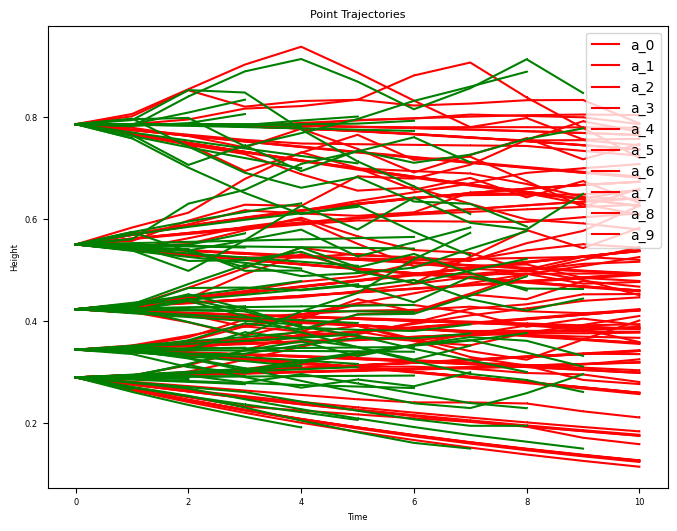

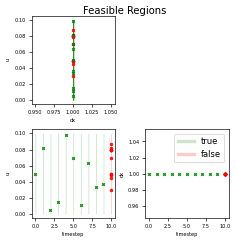

********************************************************************************
********************************************************************************
* Analysis Summary
********************************************************************************
22 Points (+:10, -:12), 22 Boxes (+:10, -:12)
Parameters = {dx[1.0, 1.0): 1.0, u[1e-18, 0.1): 0.04915839706115814}
        # {dx[1.0, 1.0): 1.0, u[1e-18, 0.1): 0.04915839706115814}
                   a_0       a_1       a_2       a_3       a_4       a_5       a_6  \
time                                                                         
0.0   0.289474  0.343750  0.423077  0.550000  0.785714  0.785714  0.550000   
1.0   0.275244  0.341082  0.419177  0.543761  0.774127  0.785714  0.561587   
2.0   0.261713  0.337845  0.415338  0.537636  0.762803  0.785145  0.572605   
3.0   0.248848  0.334103  0.411529  0.531624  0.751734  0.784046  0.583053   
4.0   0.236615  0.329912  0.407723  0.525721  0.740913  0.782458  0.592934   
5.0

In [3]:
# Advection Model

# Instance parameters (used to identify input file)
dimensions = 1
boundary_slope = 0.0
num_disc = 10
# derivative = "centered"
derivative = "backward"
# derivative = "forward"

EXAMPLE_DIR = os.path.join(RESOURCES, "advection")
instance = f"advection_{derivative}_{dimensions}_{boundary_slope}_{num_disc}.json"
instance_file = os.path.join(EXAMPLE_DIR, instance)

locations = get_locations(dimensions, num_disc)

# Funman parameters
steps = 10
dt = 1


# The energy at each location is non-negative
variables = [f"a_{loc}" for loc in locations]
height_bounds = [
    {
        "name": f"pos_{i}",
         "variable": i,
         "interval": {"lb": 0}
    }
    for i in variables
]

request_dict = {
    "structure_parameters": [
        {
            "name": "schedules",
            "schedules": [
                {"timepoints": range(0,(steps+1)*dt, dt)}
            ],
        },
        
    ],
    "parameters":[
        {
            "name": "dx",
            "label":"any",
            #  "interval": {"lb":1e-18, "ub":1e-14}}
            "interval": {"lb":1, "ub":1}},
        {
            "name": "u",
            "label":"all",
            #  "interval": {"lb":1e-18, "ub":1e-14}}
            # "interval": {"lb":-1e-1, "ub":-1e-1} # Best for centered or forward derivatives
            "interval": {"lb":1e-18, "ub":1e-1} # Best for centered or backward derivatives
        }
    ],
    "constraints": 
    height_bounds + 
    [
        {"name": "advection_magnitude",
            "variables": [variables[-1]],
            "additive_bounds": {"lb": 0.5},
            "timepoints": {"lb": steps*dt}
        }, 
 

        ],
    "config": {

    },
}



results = Runner().run(
    instance_file,
    request_dict,
    # REQUEST_PATH,
    description=f"Advection demo {instance}",
    case_out_dir="./out",
    point_plot_config={"variables":variables,},
    num_points=None,
    # dump_results=False
)

summary = summarize_results(variables, results)
print(summary)
plt.close()

h, dh, anim_h, anim_dh = plot_spatial_timeseries(results, outdir="./out")
plt.close()
display(h)
plt.close()
display(dh)